<a href="https://colab.research.google.com/github/AbhishekBangde/Loan-Default-Prediction-Using-Logistic-Regression/blob/main/LoanTap_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LoanTap Logistic Regression**


## **About LoanTap**

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

*  Personal Loan
*  EMI Free Loan
*  Personal Overdraft
*  Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

## **Data Description**

- **loan_amnt**: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

- **term**: The number of payments on the loan. Values are in months and can be either 36 or 60.

- **int_rate**: Interest Rate on the loan.

- **installment**: The monthly payment owed by the borrower if the loan originates.

- **grade**: LoanTap assigned loan grade.

- **sub_grade**: LoanTap assigned loan subgrade.

- **emp_title**: The job title supplied by the Borrower when applying for the loan.

- **emp_length**: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

- **home_ownership**: The home ownership status provided by the borrower during registration or obtained from the credit report.

- **annual_inc**: The self-reported annual income provided by the borrower during registration.

- **verification_status**: Indicates if income was verified by LoanTap, not verified, or if the income source was verified.

- **issue_d**: The month in which the loan was funded.

- **loan_status**: Current status of the loan - Target Variable.

- **purpose**: A category provided by the borrower for the loan request.

- **title**: The loan title provided by the borrower.

- **dti**: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

- **earliest_cr_line**: The month the borrower's earliest reported credit line was opened.

- **open_acc**: The number of open credit lines in the borrower's credit file.

- **pub_rec**: Number of derogatory public records.

- **revol_bal**: Total credit revolving balance.

- **revol_util**: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

- **total_acc**: The total number of credit lines currently in the borrower's credit file.

- **initial_list_status**: The initial listing status of the loan. Possible values are – W, F.

- **application_type**: Indicates whether the loan is an individual application or a joint application with two co-borrowers.

- **mort_acc**: Number of mortgage accounts.

- **pub_rec_bankruptcies**: Number of public record bankruptcies.

- **Address**: Address of the individual.

In [ ]:
import pandas as pd     #  Importing essential Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve,precision_score,f1_score,recall_score,accuracy_score

### Importing dataset

In [ ]:
! gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:00<00:00, 179MB/s] 


In [ ]:
df = pd.read_csv('logistic_regression.csv')  # Loading Dataset
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.shape  # Checking no of rows and columns

(396030, 27)

In [ ]:
df.duplicated().sum()  # Checking for duplicates

np.int64(0)

In [ ]:
df.isnull().sum()  # Checking for Null values

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


## **Countplot for loan status**

Text(0.5, 1.0, 'Loan Status Distribution')

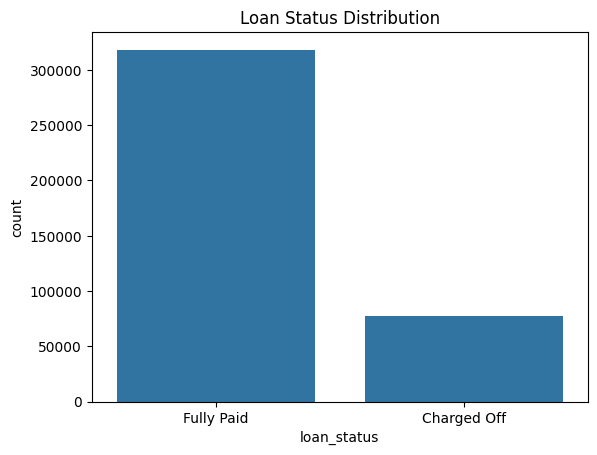

In [ ]:
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")


### The countplot shows a significantly higher number of fully paid loans compared to charged-off loans. This suggests that most borrowers successfully repay their loans, reflecting a strong repayment trend

## **Boxplots for numerical variables against loan status**

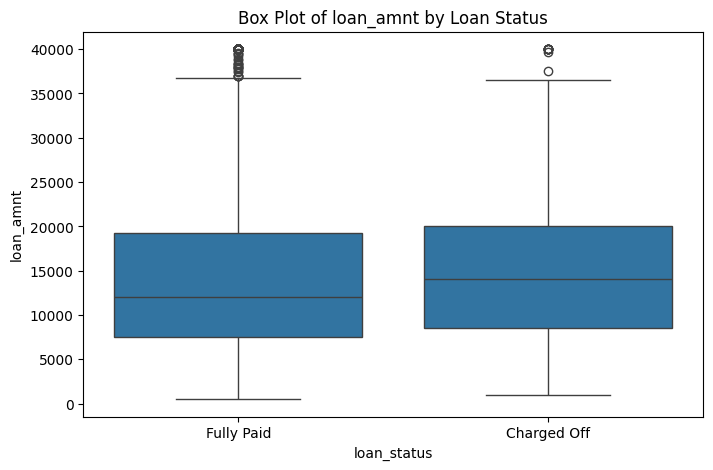

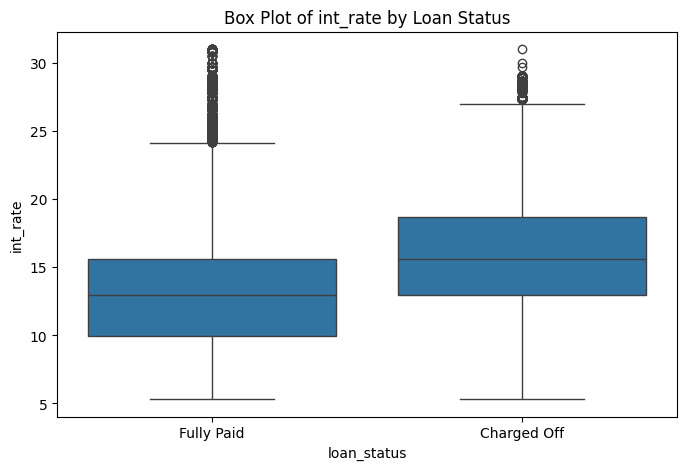

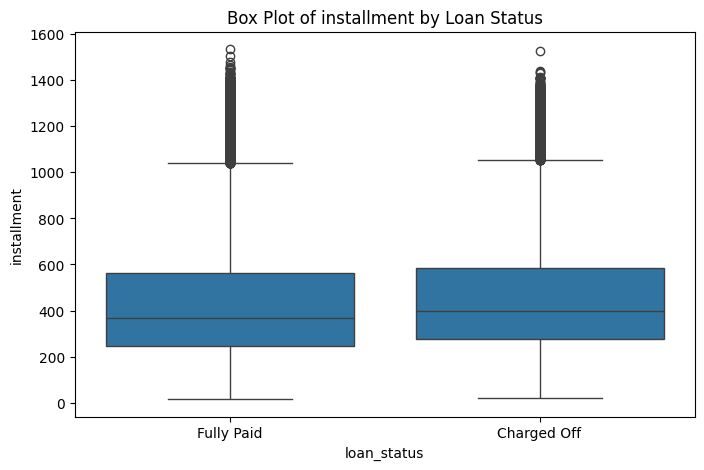

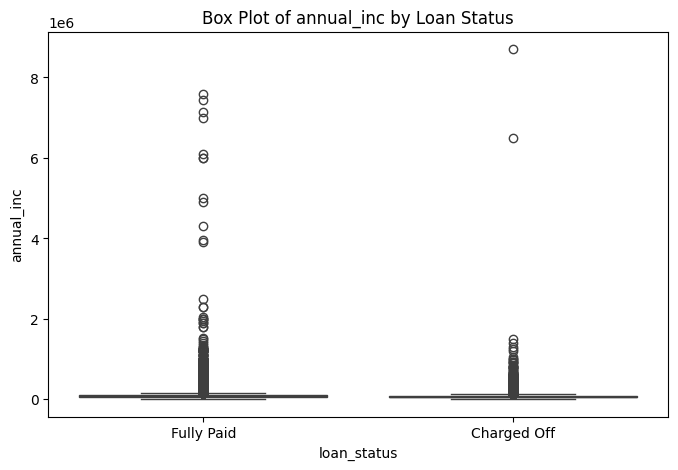

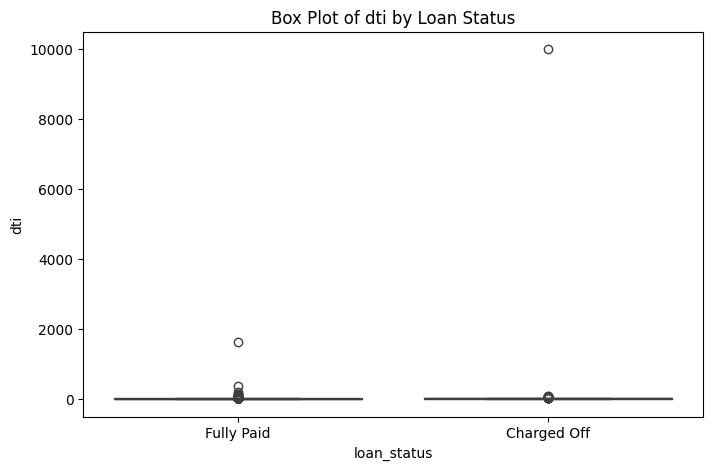

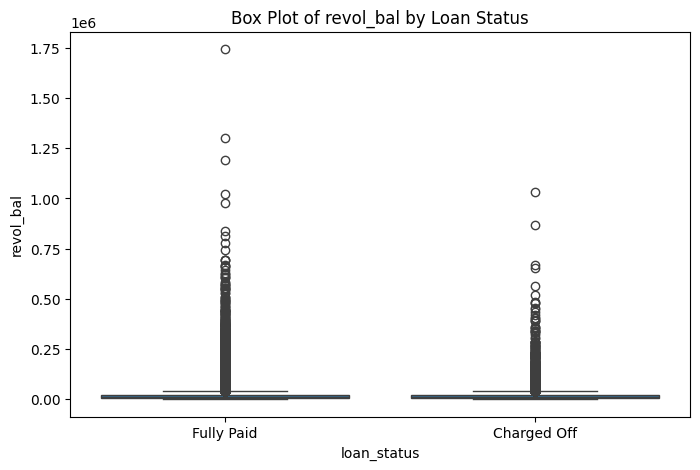

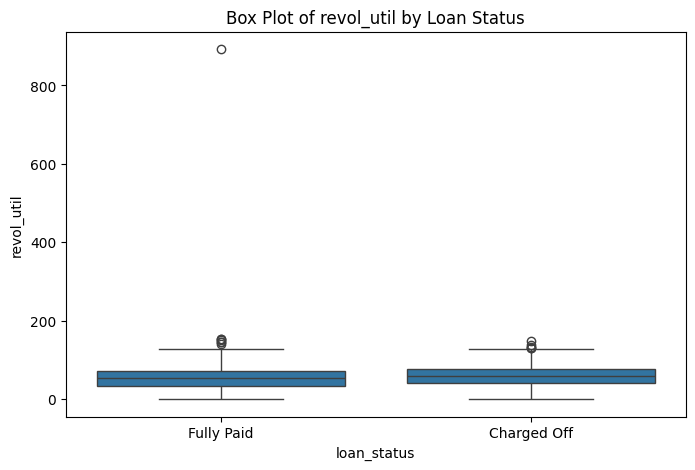

In [ ]:
numerical_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='loan_status', y=col)
    plt.title('Box Plot of ' + col + ' by Loan Status')
    plt.show()

## **Heatmap of correlations for numerical variables**

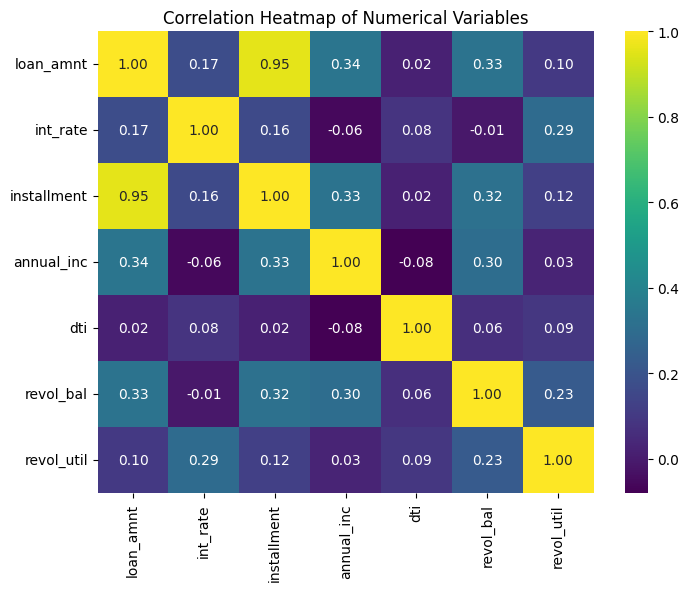

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### The heatmap highlights strong correlations between key loan-related variables, such as loan amount and installment (0.95), suggesting that higher loan amounts lead to higher monthly payments. It effectively visualizes financial relationships, aiding in better decision-making and analysis.

# **Exploratory Data Analysis**

In [ ]:
num_col = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal',
           'revol_util','total_acc','mort_acc','pub_rec_bankruptcies']
cat_col = [ 'term', 'grade', 'sub_grade','emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d','purpose', 'title',
       'earliest_cr_line','initial_list_status', 'application_type','address']

## **Categorical Variable Analysis**

In [ ]:
cat_col_df = df[cat_col]
cat_col_df.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


## **Numerical Variable Analysis**

In [ ]:
num_col_df = df[num_col]
num_col_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


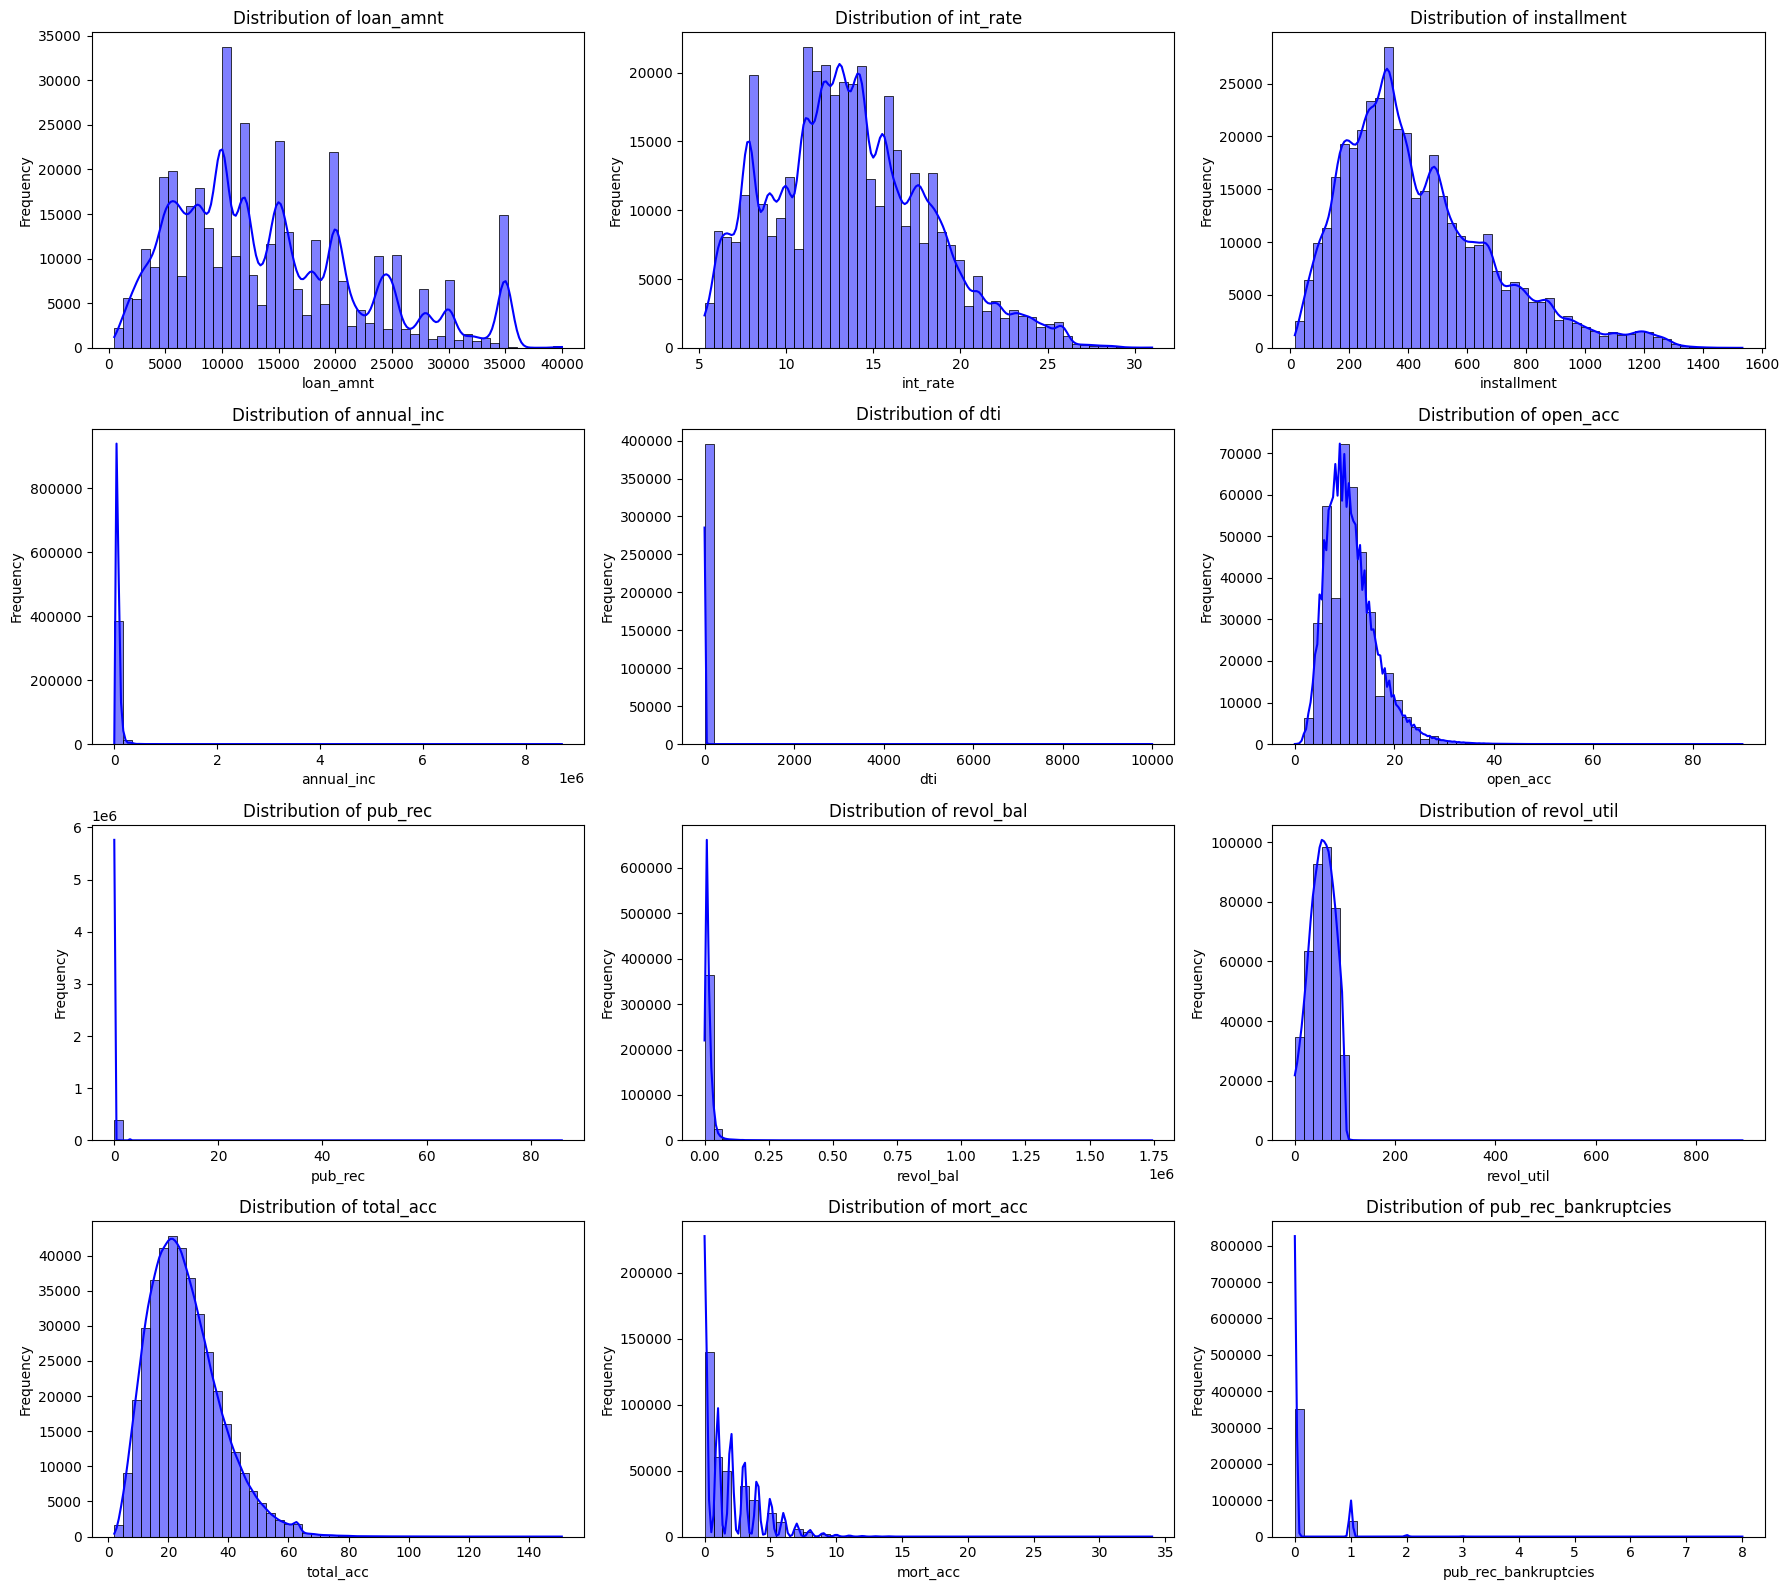

In [ ]:
num_col = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
           'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(df[col].dropna(), bins=50, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Here’s a quick breakdown of each histogram in the image**:
- Loan Amount – The distribution peaks around 10,000–15,000 and 20,000–25,000, indicating these are the most common loan amounts.
- Interest Rate – Most loans have interest rates between 10% and 15%, suggesting a preference for mid-range rates.
- Installment – Installment amounts are most frequently between 200–400, reflecting typical repayment schedules.
- Annual Income – The data is concentrated in lower income ranges, with fewer instances at higher incomes.
- Debt-to-Income (DTI) – Lower DTI values dominate, implying borrowers generally maintain reasonable debt levels.
- Open Accounts – Most individuals have 5–15 open accounts, showing common banking behavior.
- Public Records – The majority have zero public records, reinforcing a trend of financial responsibility.
- Revolving Balance – Higher balances are rarer, with a concentration at lower revolving balances.
- Revolving Utilization – Most utilization rates fall below 50%, indicating prudent credit usage.
- Total Accounts – The number of total accounts peaks around 10–30, representing a typical financial portfolio.
- Mortgage Accounts – Few individuals hold multiple mortgage accounts, as seen in the decreasing frequency.
- Public Record Bankruptcies – Almost all borrowers have zero bankruptcies, reflecting financial stability.


# **Bivariate Analysis**

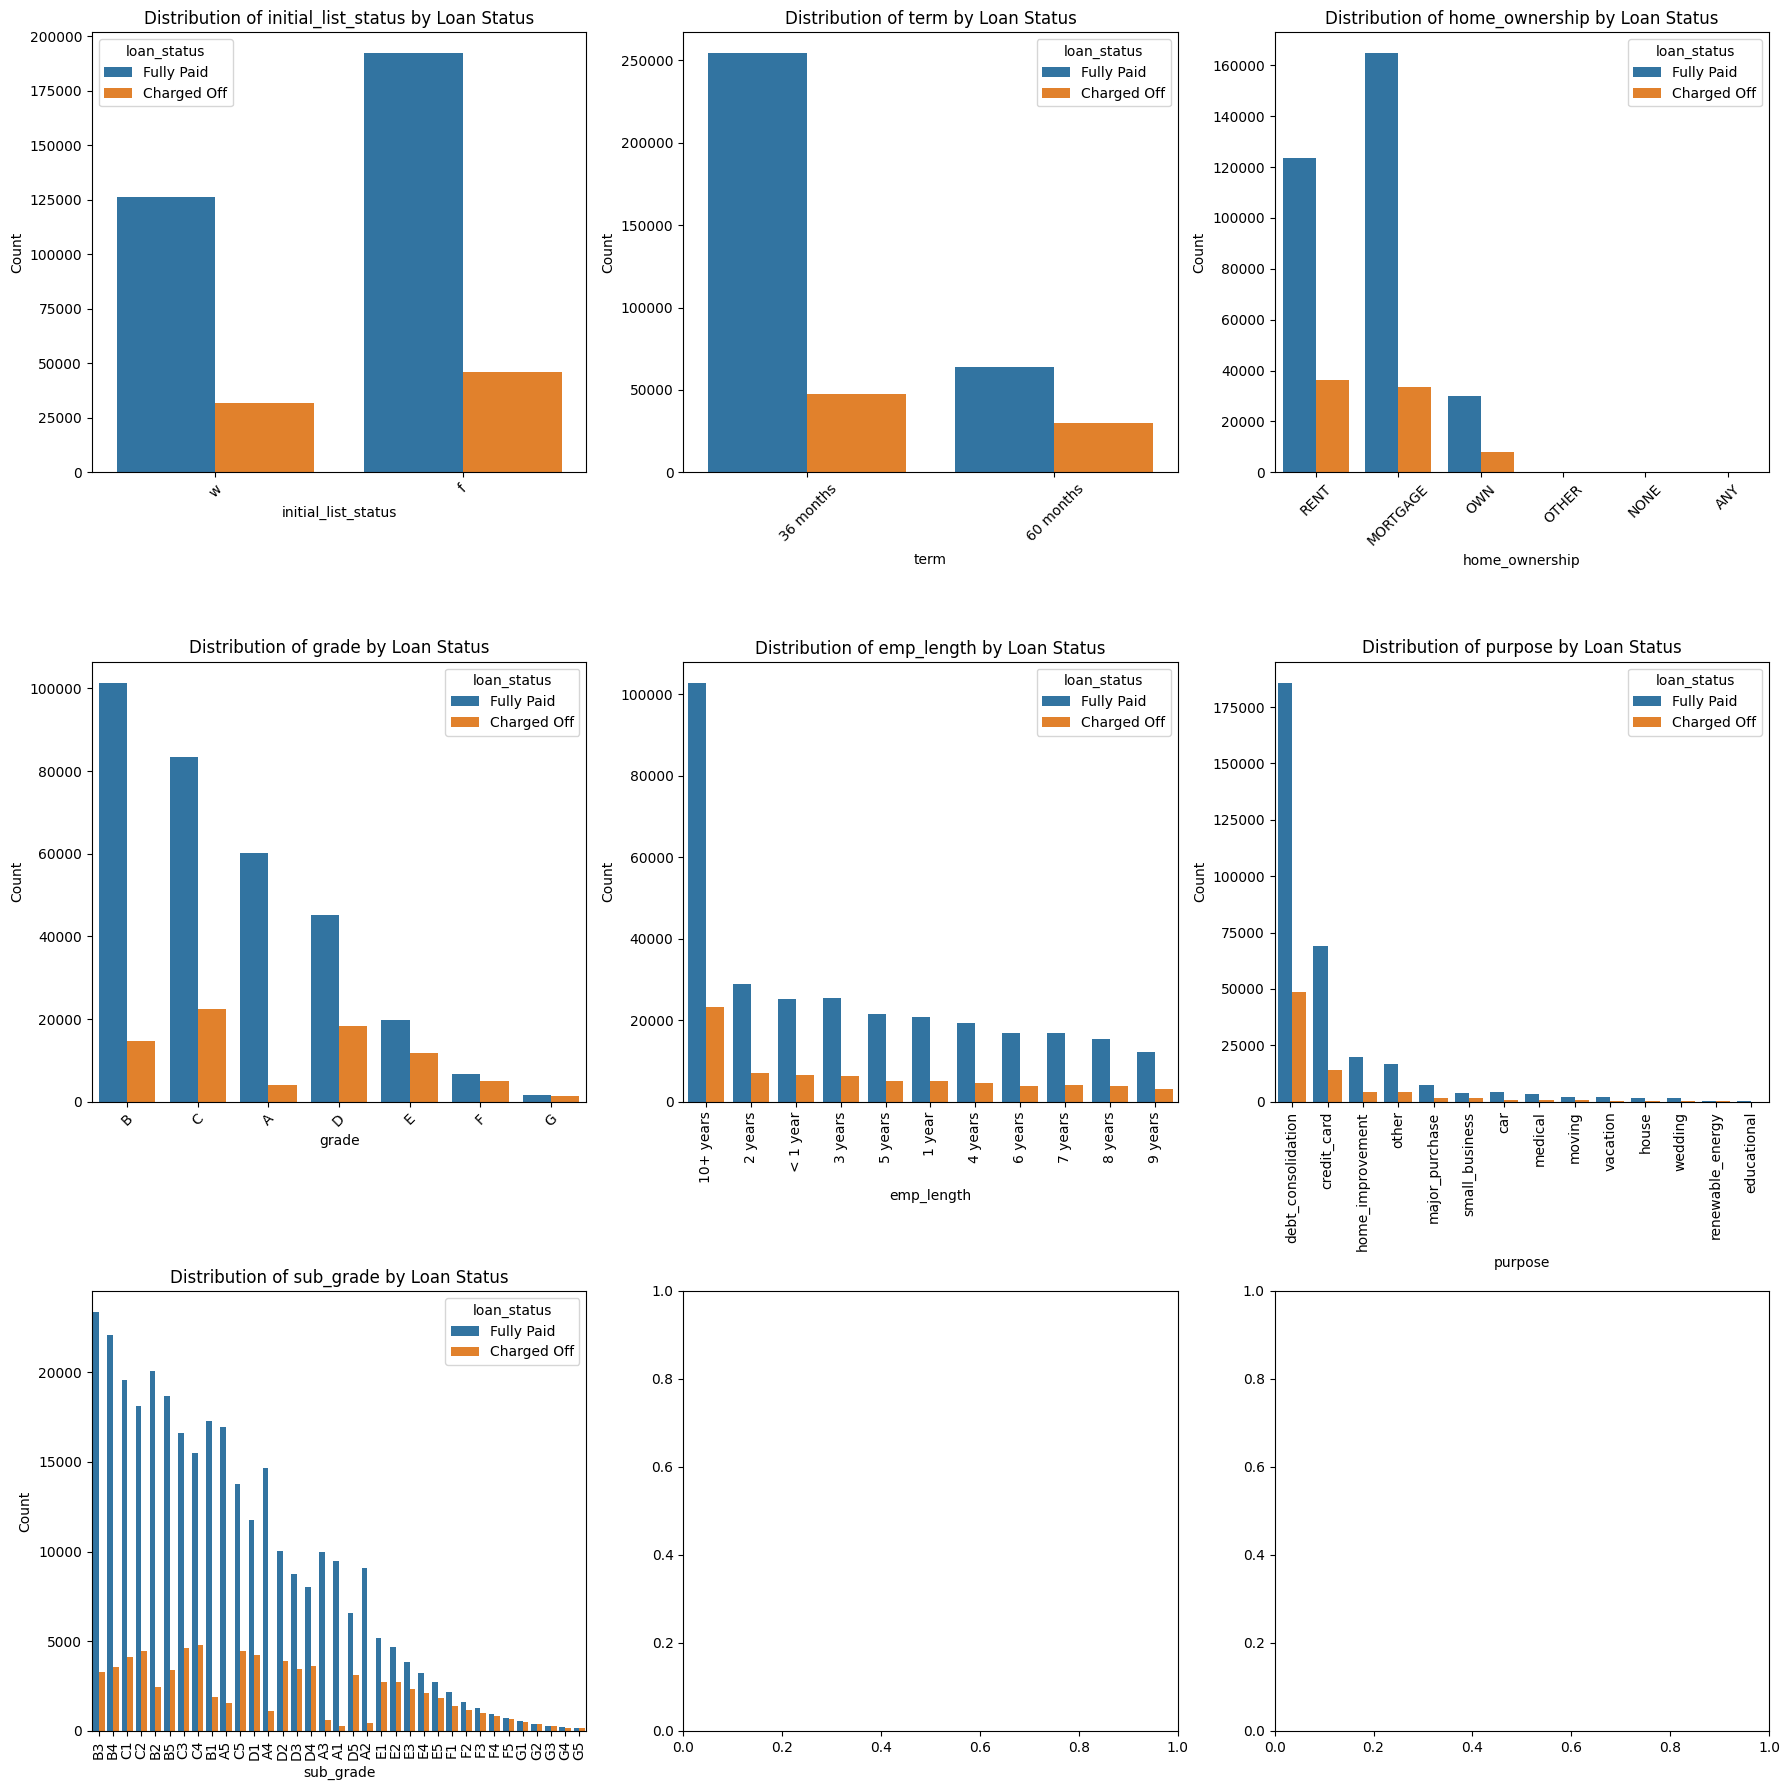

In [ ]:
cat_cols = ['initial_list_status', 'term', 'home_ownership', 'grade', 'emp_length', 'purpose', 'sub_grade']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    if i < len(axes):  # Ensure the loop doesn't exceed the number of subplots
        order = df[col].value_counts().index if col in ['grade', 'emp_length', 'purpose', 'sub_grade'] else None
        ax = sns.countplot(data=df, x=col, hue='loan_status', order=order, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by Loan Status')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90 if col in ['emp_length', 'purpose', 'sub_grade'] else 45)
plt.tight_layout()
plt.show()


- Initial List Status vs. Loan Status – Loans with initial list status "f" are more common than "w", and both statuses show a higher count of fully paid loans compared to charged-off loans.
- Term vs. Loan Status – Loans with a 36-month term have a significantly higher count of fully paid loans compared to charged-off loans, while 60-month loans show a smaller difference but still favor full repayment.
- Home Ownership vs. Loan Status – Borrowers with RENT and MORTGAGE status dominate, and both groups show more fully paid loans than charged-off loans. OWN also follows a similar trend but with lower loan counts overall.
- Grade vs. Loan Status – Loan grades B and C have the highest counts, and across all grades, fully paid loans outnumber charged-off loans. Higher grades (A, B, C) show a more pronounced difference.
- Employment Length vs. Loan Status – Loan distribution is highest for employment lengths 10+ years and < 1 year, with fully paid loans consistently outnumbering charged-off loans across all categories.
- Purpose vs. Loan Status – Debt consolidation and credit card loans dominate, both showing more fully paid loans. Other purposes have lower counts but follow a similar trend of successful repayments.
- Sub-Grade vs. Loan Status – Loan sub-grades B3, B4, C1 have the highest counts, with fully paid loans consistently outnumbering charged-off loans across all sub-grades.

Overall, the plots reveal strong repayment trends across different attributes, with higher loan grades, shorter terms, and stable employment favoring full loan repayment.

# **Data preprocessing**

### Handling Missing Values

In [ ]:
col = ['title','emp_length','emp_title']
for each in col:
    df[each].fillna(value=df[each].mode()[0],inplace=True)

mean_col = ['revol_util','mort_acc','pub_rec_bankruptcies']
for each in mean_col:
    df[each].fillna(value=df[each].mean(),inplace=True)

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


## **Converting categorical to numerical column**
Replacing all values <10 as 0 and 10+ as 1 in emp_length column

In [ ]:
df.loc[df["emp_length"] != "10+ years", "emp_length"] = 0
df.loc[df["emp_length"] == "10+ years", "emp_length"] = 1

df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_year,issue_month
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,1,RENT,117000.0,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",2015,1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,0,MORTGAGE,65000.0,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",2015,1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,0,RENT,43057.0,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",2015,1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,0,RENT,54000.0,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",2014,11
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,0,MORTGAGE,55000.0,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",2013,4


### **Dropping columns that are numerical but have a positive correlation and categorical but are adding no extra information**

In [ ]:
df.drop(columns = ['installment','pub_rec_bankruptcies', 'open_acc','issue_d','earliest_cr_line','title',
                   'emp_title','address','sub_grade'],axis = 1, inplace = True)

In [ ]:
df['term'] = df.term.str.replace(' months','').astype(int)

# **Encoding the columns**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['grade']= label_encoder.fit_transform(df['grade'])
df['grade'].unique()

array([1, 0, 2, 4, 3, 5, 6])

In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,issue_year,issue_month
0,10000.0,36,11.44,1,1,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,2015,1
1,8000.0,36,11.99,1,0,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,2015,1
2,15600.0,36,10.49,1,0,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,2015,1
3,7200.0,36,6.49,0,0,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,2014,11
4,24375.0,60,17.27,2,0,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,2013,4


### **Lets replace not verified - 0, verified - 1, Source verified - 2**

In [ ]:
df.loc[df['verification_status']=='Not Verified','verification_status'] = 0
df.loc[df['verification_status']=='Verified','verification_status'] = 1
df.loc[df['verification_status']=='Source Verified','verification_status'] = 2
df['verification_status'] = df['verification_status'].astype(int)

### **Replacing charged off as 0 and fully paid as 1**

In [ ]:
df.loc[df['loan_status']=='Fully Paid','loan_status']=1
df.loc[df['loan_status']=='Charged Off','loan_status']=0

### **Putting initial list status : w(whole) - 1, f (fractional) - 0**

In [ ]:
df.loc[df['initial_list_status']=='w','initial_list_status'] = 1
df.loc[df['initial_list_status']=='f','initial_list_status'] = 0
df['initial_list_status'] = df['initial_list_status'].astype(int)

### **Putting emp_length : '1' - 1, '0' - 0**

In [ ]:
df.loc[df['emp_length']=='1','emp_length']=1
df.loc[df['emp_length']=='0','emp_length']=0
df['emp_length'] = df['emp_length'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  int64  
 2   int_rate             396030 non-null  float64
 3   grade                396030 non-null  int64  
 4   emp_length           396030 non-null  int64  
 5   home_ownership       396030 non-null  object 
 6   annual_inc           396030 non-null  float64
 7   verification_status  396030 non-null  int64  
 8   loan_status          396030 non-null  object 
 9   purpose              396030 non-null  object 
 10  dti                  396030 non-null  float64
 11  pub_rec              396030 non-null  float64
 12  revol_bal            396030 non-null  float64
 13  revol_util           396030 non-null  float64
 14  total_acc            396030 non-null  float64
 15  initial_list_stat

# **Splitting the dataset**

In [ ]:
X = df.drop(columns = 'loan_status')
y = df['loan_status'].astype('int')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  int64  
 2   int_rate             396030 non-null  float64
 3   grade                396030 non-null  int64  
 4   emp_length           396030 non-null  int64  
 5   home_ownership       396030 non-null  object 
 6   annual_inc           396030 non-null  float64
 7   verification_status  396030 non-null  int64  
 8   purpose              396030 non-null  object 
 9   dti                  396030 non-null  float64
 10  pub_rec              396030 non-null  float64
 11  revol_bal            396030 non-null  float64
 12  revol_util           396030 non-null  float64
 13  total_acc            396030 non-null  float64
 14  initial_list_status  396030 non-null  int64  
 15  application_type 

In [ ]:
from sklearn.model_selection import train_test_split
X_train_val,X_test,y_train_val,y_test = train_test_split(X,y,random_state=True, test_size = 0.2)
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=True, test_size = 0.25)

### **Nominal category column conversion**

In [ ]:

!pip install category_encoders
import category_encoders as ce

# Initialize and fit the target encoder
encoder = ce.TargetEncoder(cols=['application_type', 'home_ownership', 'purpose'])
encoder.fit_transform(X_train, y_train)
# Transform both training and testing sets
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)
X_val_encoded = encoder.transform(X_val)

# **Building the Logistic Regression model**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_encoded)

X_train = scaler.transform(X_train_encoded)
X_val = scaler.transform(X_val_encoded)
X_test = scaler.transform(X_test_encoded)

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[-0.06278316, -0.18469667, -0.08967224, -0.36575685, -0.01437961,
         0.11726617,  0.18671761, -0.05775546,  0.05591057, -0.49796263,
        -0.03230017,  0.03883259, -0.0772723 ,  0.02974275,  0.01877572,
        -0.00517635,  0.08571469, -0.06988225,  0.03126532]])

In [ ]:
model.intercept_

array([1.57648542])

In [ ]:
y_pred = model.predict(X_test)

model.score(X_val,y_val)

0.8042582417582418

# **Hyperparameter Tuning**

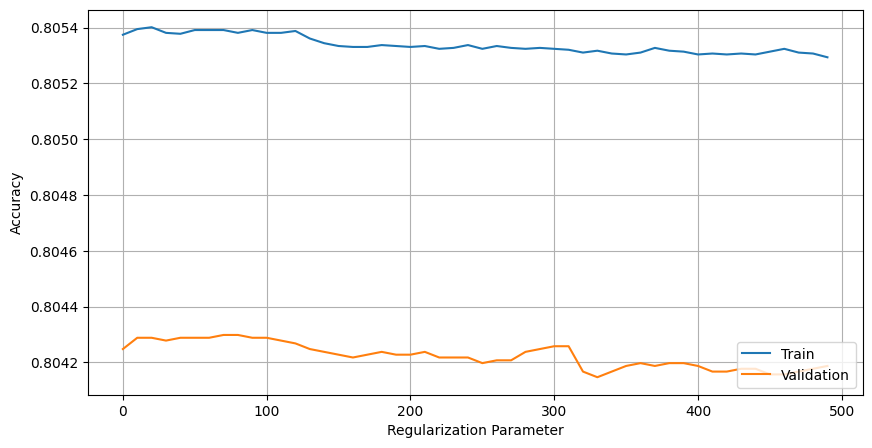

In [ ]:
from sklearn.pipeline import make_pipeline

train_scores, val_scores = [], []

for lam in np.arange(0.01, 500, 10):
    model = make_pipeline(StandardScaler(), LogisticRegression(C=1/lam))
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    val_scores.append(model.score(X_val, y_val))

plt.figure(figsize=(10, 5))
plt.plot(np.arange(0.01, 500, 10), train_scores, label='Train')
plt.plot(np.arange(0.01, 500, 10), val_scores, label='Validation')
plt.legend(loc='lower right')
plt.xlabel('Regularization Parameter')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Insights from the Accuracy vs. Regularization Parameter plot:
- Training Accuracy Stability – The training accuracy remains nearly constant around 0.8053 across different regularization values, indicating minimal impact on model performance during training.
- Validation Accuracy Variation – The validation accuracy fluctuates more than the training accuracy, hovering around 0.8043, which suggests sensitivity to regularization.
- Overfitting Concern – The validation accuracy consistently remains lower than the training accuracy, hinting at possible overfitting, where the model performs better on the training data but struggles with unseen data.
- Regularization Impact – Instead of improving performance, increasing the regularization parameter appears to slightly lower validation accuracy, suggesting potential underfitting at higher values.

Overall, the plot emphasizes the importance of selecting an optimal regularization value to balance model complexity and generalization, avoiding both overfitting and underfitting.


# **Model Performance**

In [ ]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / y_true.shape[0]

# Predict the labels for the training set
train_pred = model.predict(X_train)

train_accuracy = accuracy(y_train, train_pred)

print(f'Train Accuracy: {train_accuracy}')

Train Accuracy: 0.8052938839547239


In [ ]:
accuracy(y_val, model.predict(X_val))

np.float64(0.8041875404007757)

In [ ]:
accuracy(y_test, model.predict(X_test))

np.float64(0.8037017397671894)

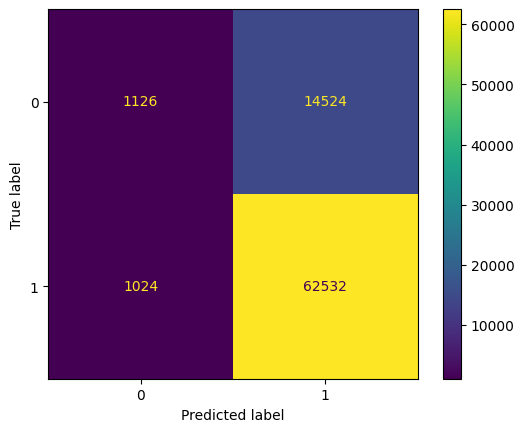

In [ ]:
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
conf = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=model.classes_)
disp.plot()
plt.show()

The confusion matrix reveals key patterns in the model’s classification performance:
- High True Positives (62532) – The model excels at correctly identifying class 1, indicating strong predictive accuracy for this category.
- Significant False Positives (14524) – A notable number of class 0 instances are misclassified as class 1, suggesting potential bias towards predicting class 1.
- Relatively Low False Negatives (1024) – The model misclassifies fewer class 1 instances as class 0, showing it effectively captures positive cases.
- Low True Negatives (1126) – The model struggles to correctly identify class 0, hinting at an imbalance favoring the dominant class.

Overall, the matrix suggests the model performs well in predicting class 1, but may need adjustments to better distinguish class 0 and reduce false positives.


In [ ]:
sensitivity = 62532/(1024+62532)
sensitivity

0.9838882245578702

### A sensitivity of 98.38% reflects a highly effective model in identifying positive cases. This capability is advantageous in many applications, yet it should be balanced with specificity to ensure that the model performs well across all classification aspects without compromising overall effectiveness.

# **precision_score, f1_score**

In [ ]:
precision_score(y_test, y_pred)

0.8118473686944776

### A precision score of 81.18% reflects a strong ability of the model to correctly identify positive cases among its predictions. While this is a good indicator of performance, ongoing adjustments and evaluations are recommended to ensure a balanced trade-off between precision and sensitivity, thereby enhancing overall model reliability in practical applications.

In [ ]:
f1_score(y_test,y_pred)

0.8894786271273265

### An F1 score of 88.94% signifies a well-rounded model with a strong ability to balance the trade-offs between precision and sensitivity. This level of performance is typically desirable in applications where accuracy is critical. Continued monitoring and adjustments can further solidify the model's effectiveness in diverse situations.

# **ROC curve (Receiver Operating Characteristic) , AUC Curve (Area Under the Curve)**

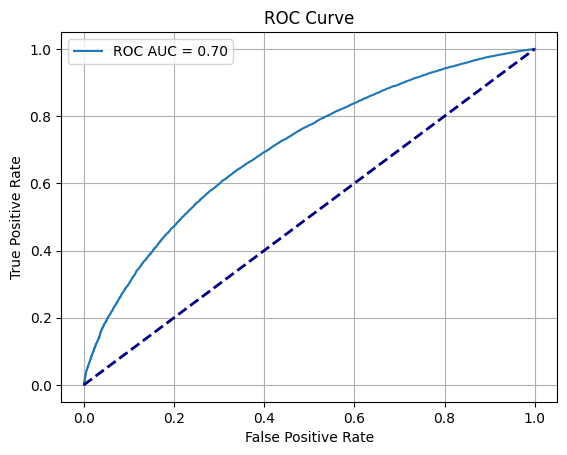

In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()

### The ROC curve and corresponding AUC of 0.70 indicate a model with moderate discriminative power. While it performs better than random guessing, there is potential for improving classification accuracy through additional model optimization and tuning. Carefully choosing the decision threshold can also help balance the trade-offs inherent in false positives and negatives, aligning the model's use with strategic objectives.

# **📊 Insights**
1. Loan Repayment Trends-Majority of loans are fully paid rather than charged off, indicating strong borrower repayment behavior.

2. Key Feature Correlations- Loan amount and installment are highly correlated (correlation ≈ 0.95).

3. Interest rates are mostly in the 10–15% range, suggesting a mid-range loan market focus.

4. Borrower Financial Behavior

5. Most borrowers have low Debt-to-Income (DTI) ratios and revolving utilization rates below 50%, showing financial responsibility.

6. Annual incomes cluster at lower to mid-level ranges (~₹45,000 to ₹90,000).

7. Loan Term Impact - 36-month loans show better repayment rates compared to 60-month loans.

8. Home Ownership and Employment - Borrowers with RENT or MORTGAGE ownership and 10+ years employment have better loan repayment rates.

9. Model Performance - Logistic Regression achieved an accuracy of ~80.4% on validation data.

10. Sensitivity (Recall) is very high (98.38%), meaning almost all fully paid loans are correctly identified.

11. Precision is good (~81.18%), ensuring relatively fewer false positives.

12. F1-score is ~88.94%, reflecting a balanced model between precision and recall.

13. AUC Score of 0.70 suggests moderate discriminative power; room for improvement exists.

14. Error Analysis - False positives (predicting loan will be paid but it is charged off) are relatively high.

15. Model slightly favors predicting fully paid status over charged off.

# **🛠️ Recommendations**

1. Model Enhancement - Try more advanced models like Random Forest, XGBoost, or LightGBM to improve AUC and capture complex patterns better than logistic regression.

2. Perform feature selection/engineering (e.g., interaction terms) to enhance prediction power.

3. Address False Positives - Fine-tune the decision threshold instead of using default 0.5, balancing precision and recall better.

4. Apply cost-sensitive learning or class weighting to penalize misclassification of charged-off loans more heavily.

5. Feature Improvements - Introduce credit score bands, industry type for employment, and regional economic indicators as additional features to improve underwriting.

6. Data Quality Improvements - Address missing data more carefully rather than blanket filling (e.g., imputation using similar groups rather than global mean/mode).

7. Investigate high-income outliers (like incomes > ₹8 million) and consider capping them.

8. Business Actions - Offer shorter-term loans (36 months) more aggressively, as they have better repayment trends.

9. Target borrowers with stable employment (10+ years) and low DTI ratios for safer underwriting.

10. Carefully monitor high loan amounts and higher-grade loans (C and below) to minimize risks.

11. Monitoring and Model Updates - Continuously monitor the model performance monthly.

12. Retrain the model every 6–12 months as borrower behavior and economic conditions change.